In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, RobustScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import ast
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import uniform, randint
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import joblib


In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('mode.chained_assignment', None)

In [4]:
df=pd.read_csv('/content/drive/MyDrive/course final idk lol lmao/dataset.csv')

In [6]:
df[df['genres']=='[]']

,feature,chroma_cens,chroma_cens.1,chroma_cens.2,chroma_cens.3,chroma_cens.4,chroma_cens.5,chroma_cens.6,chroma_cens.7,chroma_cens.8,chroma_cens.9,chroma_cens.10,chroma_cens.11,chroma_cens.12,chroma_cens.13,chroma_cens.14,chroma_cens.15,chroma_cens.16,chroma_cens.17,chroma_cens.18,chroma_cens.19,chroma_cens.20,chroma_cens.21,chroma_cens.22,chroma_cens.23,chroma_cens.24,chroma_cens.25,chroma_cens.26,chroma_cens.27,chroma_cens.28,chroma_cens.29,chroma_cens.30,chroma_cens.31,chroma_cens.32,chroma_cens.33,chroma_cens.34,chroma_cens.35,chroma_cens.36,chroma_cens.37,chroma_cens.38,chroma_cens.39,chroma_cens.40,chroma_cens.41,chroma_cens.42,chroma_cens.43,chroma_cens.44,chroma_cens.45,chroma_cens.46,chroma_cens.47,chroma_cens.48,chroma_cens.49,chroma_cens.50,chroma_cens.51,chroma_cens.52,chroma_cens.53,chroma_cens.54,chroma_cens.55,chroma_cens.56,chroma_cens.57,chroma_cens.58,chroma_cens.59,chroma_cens.60,chroma_cens.61,chroma_cens.62,chroma_cens.63,chroma_cens.64,chroma_cens.65,chroma_cens.66,chroma_cens.67,chroma_cens.68,chroma_cens.69,chroma_cens.70,chroma_cens.71,chroma_cens.72,chroma_cens.73,chroma_cens.74,chroma_cens.75,chroma_cens.76,chroma_cens.77,chroma_cens.78,chroma_cens.79,chroma_cens.80,chroma_cens.81,chroma_cens.82,chroma_cens.83,chroma_cqt,chroma_cqt.1,chroma_cqt.2,chroma_cqt.3,chroma_cqt.4,chroma_cqt.5,chroma_cqt.6,chroma_cqt.7,chroma_cqt.8,chroma_cqt.9,chroma_cqt.10,chroma_cqt.11,chroma_cqt.12,chroma_cqt.13,chroma_cqt.14,chroma_cqt.15,chroma_cqt.16,chroma_cqt.17,chroma_cqt.18,chroma_cqt.19,chroma_cqt.20,chroma_cqt.21,chroma_cqt.22,chroma_cqt.23,chroma_cqt.24,chroma_cqt.25,chroma_cqt.26,chroma_cqt.27,chroma_cqt.28,chroma_cqt.29,chroma_cqt.30,chroma_cqt.31,chroma_cqt.32,chroma_cqt.33,chroma_cqt.34,chroma_cqt.35,chroma_cqt.36,chroma_cqt.37,chroma_cqt.38,chroma_cqt.39,chroma_cqt.40,chroma_cqt.41,chroma_cqt.42,chroma_cqt.43,chroma_cqt.44,chroma_cqt.45,chroma_cqt.46,chroma_cqt.47,chroma_cqt.48,chroma_cqt.49,chroma_cqt.50,chroma_cqt.51,chroma_cqt.52,chroma_cqt.53,chroma_cqt.54,chroma_cqt.55,chroma_cqt.56,chroma_cqt.57,chroma_cqt.58,chroma_cqt.59,chroma_cqt.60,chroma_cqt.61,chroma_cqt.62,chroma_cqt.63,chroma_cqt.64,chroma_cqt.65,chroma_cqt.66,chroma_cqt.67,chroma_cqt.68,chroma_cqt.69,chroma_cqt.70,chroma_cqt.71,chroma_cqt.72,chroma_cqt.73,chroma_cqt.74,chroma_cqt.75,chroma_cqt.76,chroma_cqt.77,chroma_cqt.78,chroma_cqt.79,chroma_cqt.80,chroma_cqt.81,chroma_cqt.82,chroma_cqt.83,chroma_stft,chroma_stft.1,chroma_stft.2,chroma_stft.3,chroma_stft.4,chroma_stft.5,chroma_stft.6,chroma_stft.7,chroma_stft.8,chroma_stft.9,chroma_stft.10,chroma_stft.11,chroma_stft.12,chroma_stft.13,chroma_stft.14,chroma_stft.15,chroma_stft.16,chroma_stft.17,chroma_stft.18,chroma_stft.19,chroma_stft.20,chroma_stft.21,chroma_stft.22,chroma_stft.23,chroma_stft.24,chroma_stft.25,chroma_stft.26,chroma_stft.27,chroma_stft.28,chroma_stft.29,chroma_stft.30,chroma_stft.31,chroma_stft.32,chroma_stft.33,chroma_stft.34,chroma_stft.35,chroma_stft.36,chroma_stft.37,chroma_stft.38,chroma_stft.39,chroma_stft.40,chroma_stft.41,chroma_stft.42,chroma_stft.43,chroma_stft.44,chroma_stft.45,chroma_stft.46,chroma_stft.47,chroma_stft.48,chroma_stft.49,chroma_stft.50,chroma_stft.51,chroma_stft.52,chroma_stft.53,chroma_stft.54,chroma_stft.55,chroma_stft.56,chroma_stft.57,chroma_stft.58,chroma_stft.59,chroma_stft.60,chroma_stft.61,chroma_stft.62,chroma_stft.63,chroma_stft.64,chroma_stft.65,chroma_stft.66,chroma_stft.67,chroma_stft.68,chroma_stft.69,chroma_stft.70,chroma_stft.71,chroma_stft.72,chroma_stft.73,chroma_stft.74,chroma_stft.75,chroma_stft.76,chroma_stft.77,chroma_stft.78,chroma_stft.79,chroma_stft.80,chroma_stft.81,chroma_stft.82,chroma_stft.83,mfcc,mfcc.1,mfcc.2,mfcc.3,mfcc.4,mfcc.5,mfcc.6,mfcc.7,mfcc.8,mfcc.9,mfcc.10,mfcc.11,mfcc.12,mfcc.13,mfcc.14,mfcc.15,mfcc.16,mfcc.17,mfcc.18,mfcc.19,mfcc.20,mfcc.21,mfcc.22,mfcc.23,mfcc.24,mfcc.25,mfcc.26,mfcc.27,mfcc.28,mfcc.29,mfcc.30,mfcc.31,mfcc.32,mfcc.33,mfcc.34,mfcc.35,mfcc.36,mfcc.37,mfcc.38,mfcc.39,mfcc.40,mfcc.41,mfcc.42

In [7]:
df.columns

Index(['feature', 'chroma_cens', 'chroma_cens.1', 'chroma_cens.2',
       'chroma_cens.3', 'chroma_cens.4', 'chroma_cens.5', 'chroma_cens.6',
       'chroma_cens.7', 'chroma_cens.8',
       ...
       'tonnetz.40', 'tonnetz.41', 'zcr', 'zcr.1', 'zcr.2', 'zcr.3', 'zcr.4',
       'zcr.5', 'zcr.6', 'genres'],
      dtype='object', length=520)

### limiting the genres column to only the first genre in the list to ease computation

In [8]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [9]:

df['primary_genre'] = df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)


In [10]:
df['primary_genre'].value_counts()

,count
primary_genre,
15.0,20325
1.0,8219
38.0,6674
12.0,6639
10.0,5910
17.0,4209
21.0,4020
25.0,3562
32.0,3323


In [11]:

df = df.dropna(subset=['primary_genre']).reset_index(drop=True)
df['primary_genre'] = df['primary_genre'].astype(int)

In [12]:
df['primary_genre']

Output hidden; open in https://colab.research.google.com to view.

In [13]:
df.shape

(103789, 521)

### visualising the genres column to decide on eigther oversampling or undersampling

In [14]:
px.histogram(data_frame=df , x = 'primary_genre' , text_auto=True )

### cutting off severly undersampled genres (noise)

In [15]:
cutoff = 20
genre_counts = df['primary_genre'].value_counts()
selected_genres = genre_counts[genre_counts >= cutoff].index
df = df[df['primary_genre'].isin(selected_genres)].reset_index(drop=True)


In [16]:
df['primary_genre'].value_counts()

,count
primary_genre,
15,20325
1,8219
38,6674
12,6639
10,5910
17,4209
21,4020
25,3562
32,3323


### separating into features and target

In [17]:
df.columns

Index(['feature', 'chroma_cens', 'chroma_cens.1', 'chroma_cens.2',
       'chroma_cens.3', 'chroma_cens.4', 'chroma_cens.5', 'chroma_cens.6',
       'chroma_cens.7', 'chroma_cens.8',
       ...
       'tonnetz.41', 'zcr', 'zcr.1', 'zcr.2', 'zcr.3', 'zcr.4', 'zcr.5',
       'zcr.6', 'genres', 'primary_genre'],
      dtype='object', length=521)

In [18]:
X= df.iloc[:,1:-2]  #skip track id column and genre column
y= df.iloc[:,-1]

## oversampling minority with controlled sampling

In [19]:
target_class_size = 5000

sampling_strategy = {}

class_counts = Counter(y)

for label, count in class_counts.items():
    if count < target_class_size:
        sampling_strategy[label] = target_class_size  # Target size per minority class
    else:
        sampling_strategy[label] = count  # Keep larger classes unchanged

oversampler = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

/tmp/ipython-input-20-2370150562.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




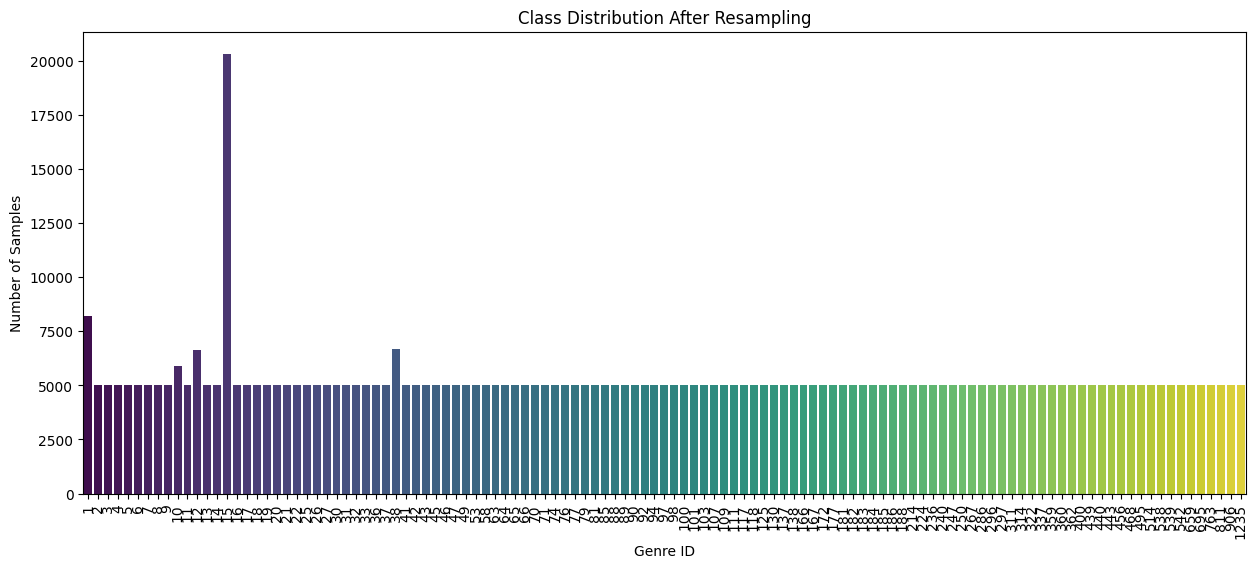

In [20]:
resampled_counts = pd.Series(Counter(y_resampled)).sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=resampled_counts.index, y=resampled_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Class Distribution After Resampling')
plt.xlabel('Genre ID')
plt.ylabel('Number of Samples')
plt.show()

### light undersampling

In [21]:
target_max_size = 8000

undersampling_strategy = {}

for label, count in Counter(y_resampled).items():
    if count > target_max_size:
        undersampling_strategy[label] = target_max_size
    else:
        undersampling_strategy[label] = count

undersampler = RandomUnderSampler(sampling_strategy=undersampling_strategy, random_state=42)
X_balanced, y_balanced = undersampler.fit_resample(X_resampled, y_resampled)


/tmp/ipython-input-22-2139517134.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




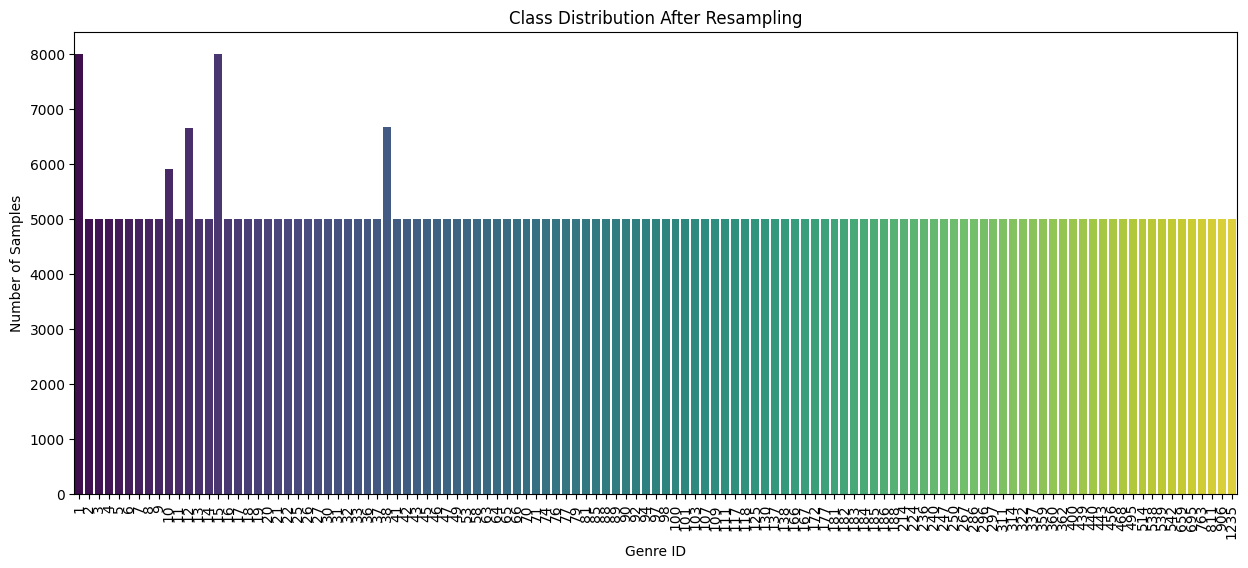

In [22]:
resampled_counts = pd.Series(Counter(y_balanced)).sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=resampled_counts.index, y=resampled_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('Class Distribution After Resampling')
plt.xlabel('Genre ID')
plt.ylabel('Number of Samples')
plt.show()

## **visible outliers for most -if not all- columns**

<Axes: xlabel='chroma_cens.4'>

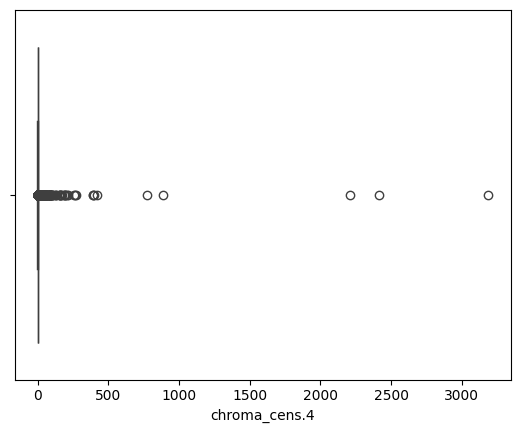

In [23]:
sns.boxplot(x='chroma_cens.4', data=df)
# sns.stripplot(x='zcr.2', data=df, color="#474646")

## comparison between two scaled models


/tmp/ipython-input-21-1914278766.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


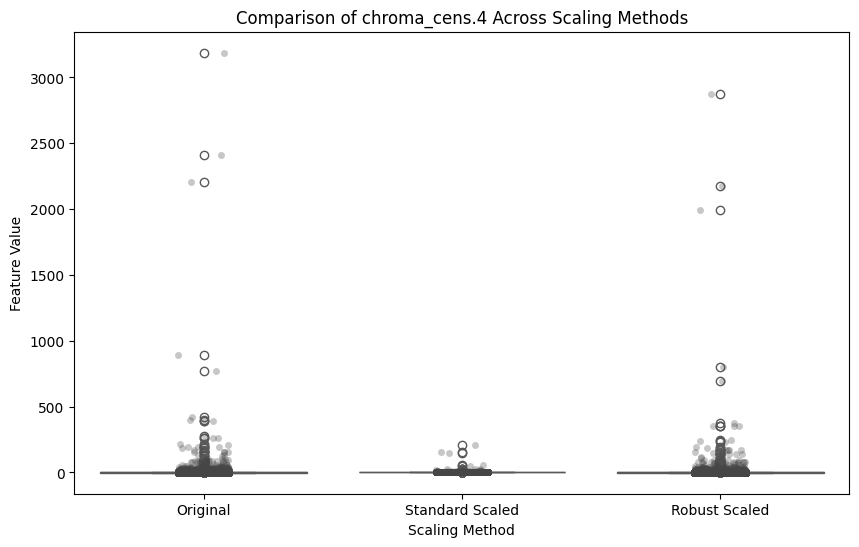

In [ ]:

feature = 'chroma_cens.4'

standard_scaler = StandardScaler()
df['Standard Scaled'] = standard_scaler.fit_transform(df[[feature]])

robust_scaler = RobustScaler()
df['Robust Scaled'] = robust_scaler.fit_transform(df[[feature]])

df_plot = df[[feature, 'Standard Scaled', 'Robust Scaled']]
df_melt = df_plot.melt(var_name='Scaling Method', value_name='Feature Value')

df_melt['Scaling Method'] = df_melt['Scaling Method'].replace({feature: 'Original'})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')
sns.stripplot(x='Scaling Method', y='Feature Value', data=df_melt, color="#474646", alpha=0.3)
plt.title(f'Comparison of {feature} Across Scaling Methods')
plt.show()

/tmp/ipython-input-22-2253378355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


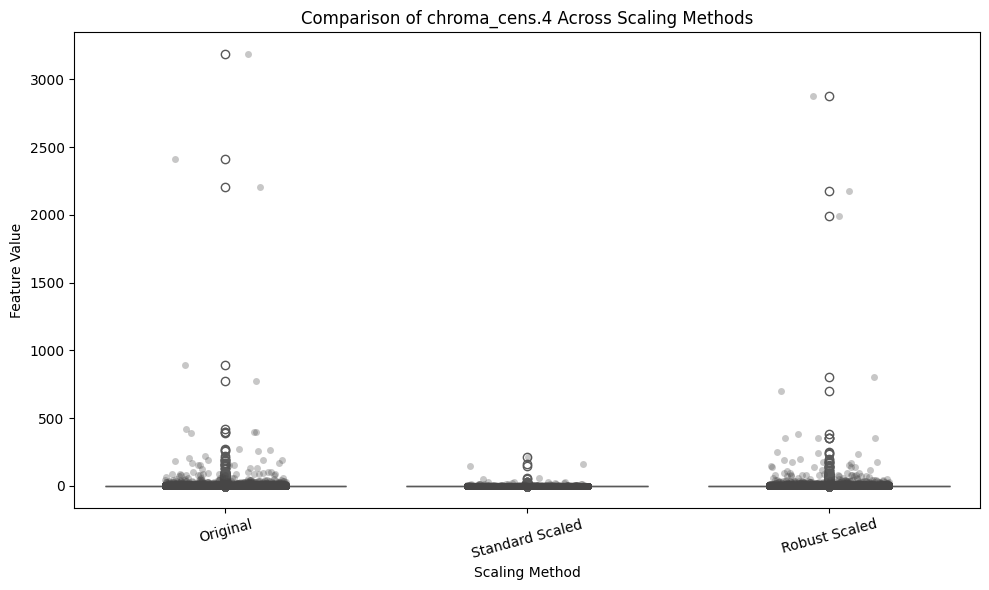

/tmp/ipython-input-22-2253378355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


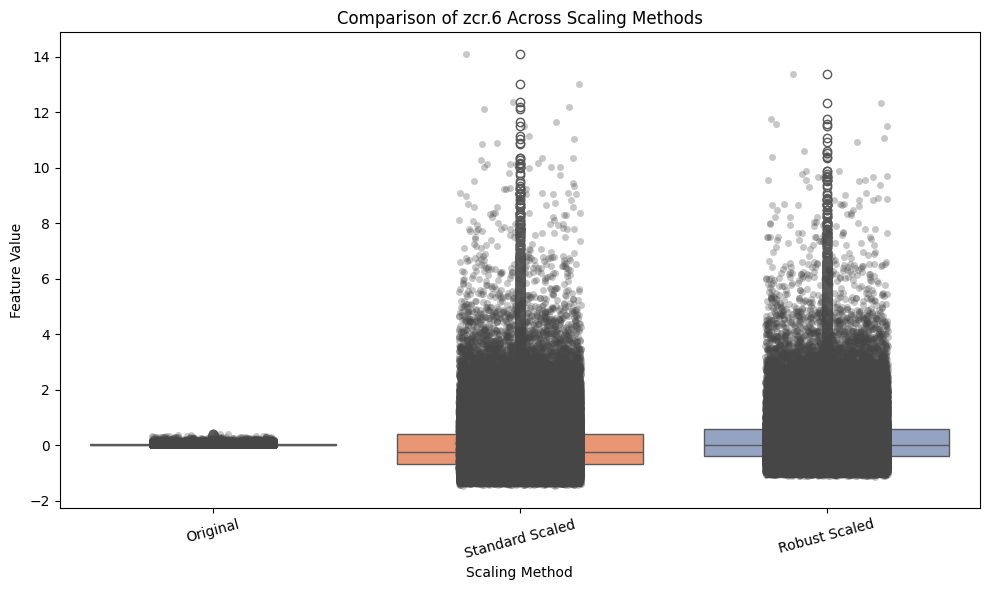

/tmp/ipython-input-22-2253378355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


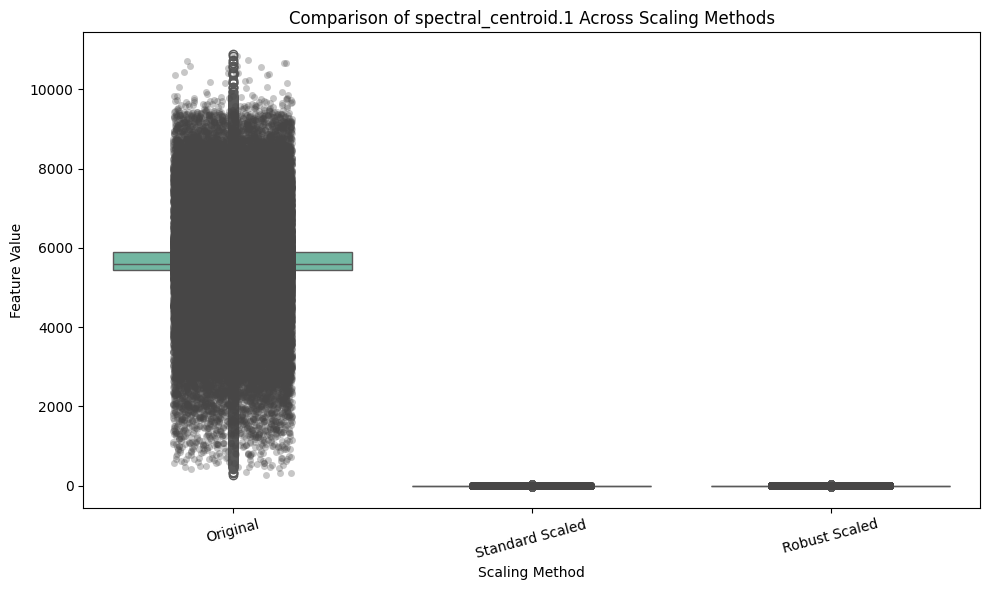

/tmp/ipython-input-22-2253378355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


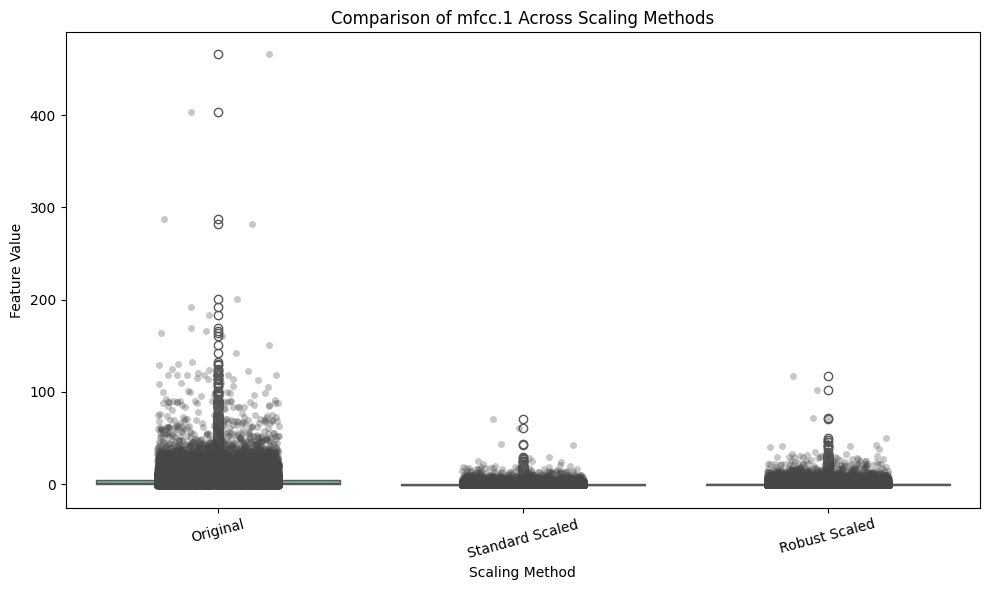

/tmp/ipython-input-22-2253378355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


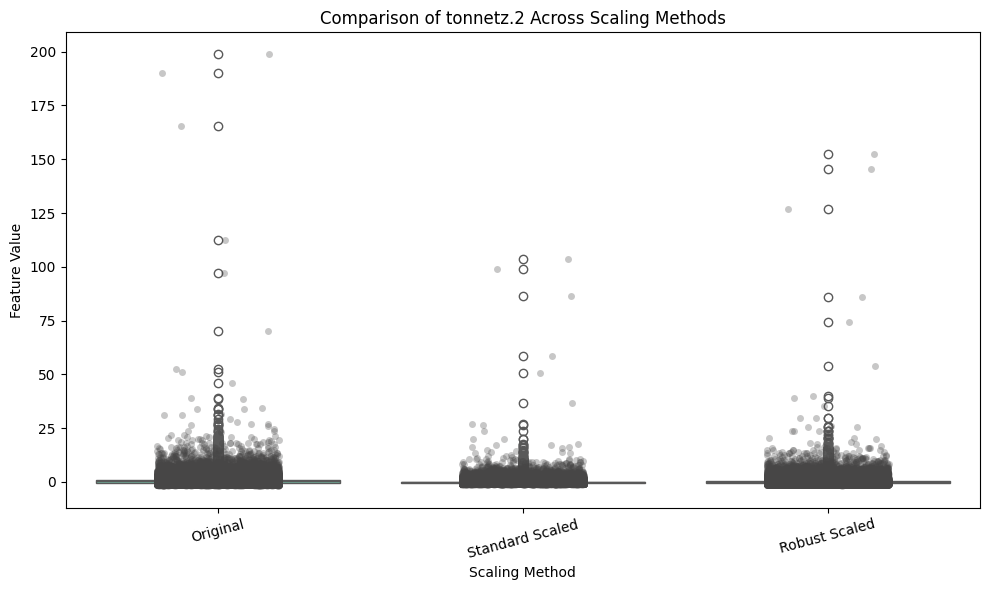

In [ ]:
features_to_plot = ['chroma_cens.4', 'zcr.6', 'spectral_centroid.1', 'mfcc.1', 'tonnetz.2']

for feature in features_to_plot:
    standard_scaled = StandardScaler().fit_transform(df[[feature]])
    robust_scaled = RobustScaler().fit_transform(df[[feature]])

    df_plot = pd.DataFrame({
        'Original': df[feature],
        'Standard Scaled': standard_scaled.flatten(),
        'Robust Scaled': robust_scaled.flatten()
    })

    df_melt = df_plot.melt(var_name='Scaling Method', value_name='Feature Value')
    df_melt['Scaling Method'] = df_melt['Scaling Method'].replace({feature: 'Original'})

    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')
    sns.stripplot(x='Scaling Method', y='Feature Value', data=df_melt, color="#474646", alpha=0.3, jitter=0.2)
    plt.title(f'Comparison of {feature} Across Scaling Methods')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-23-911324674.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


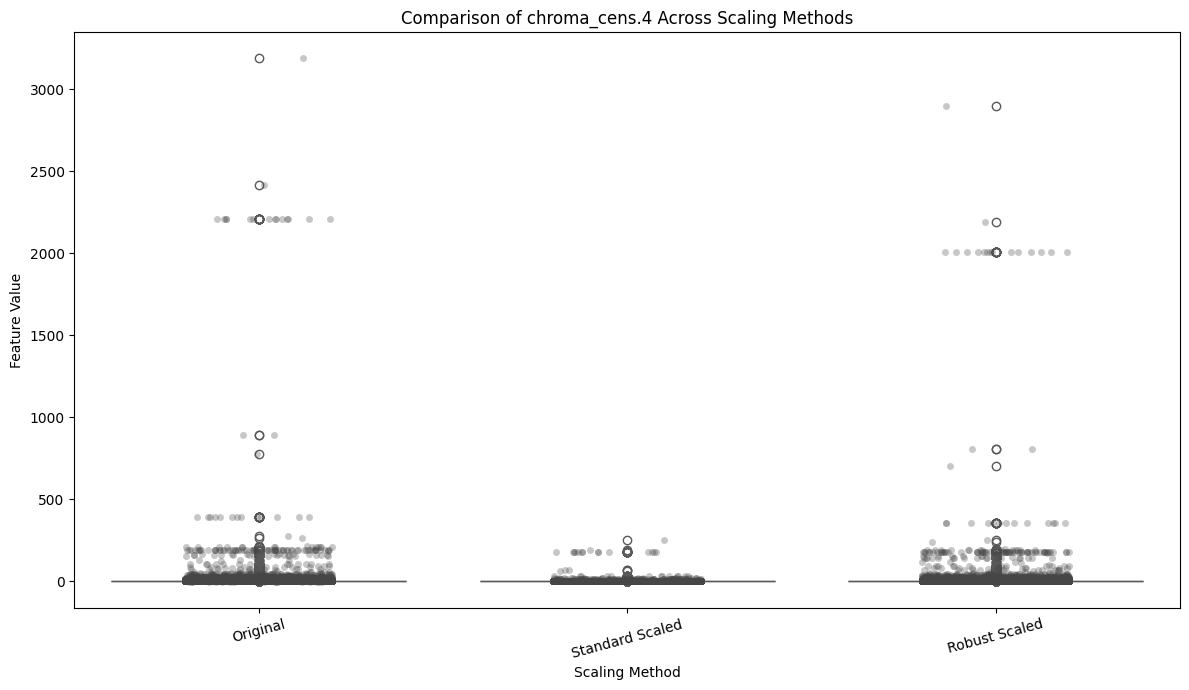

/tmp/ipython-input-23-911324674.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


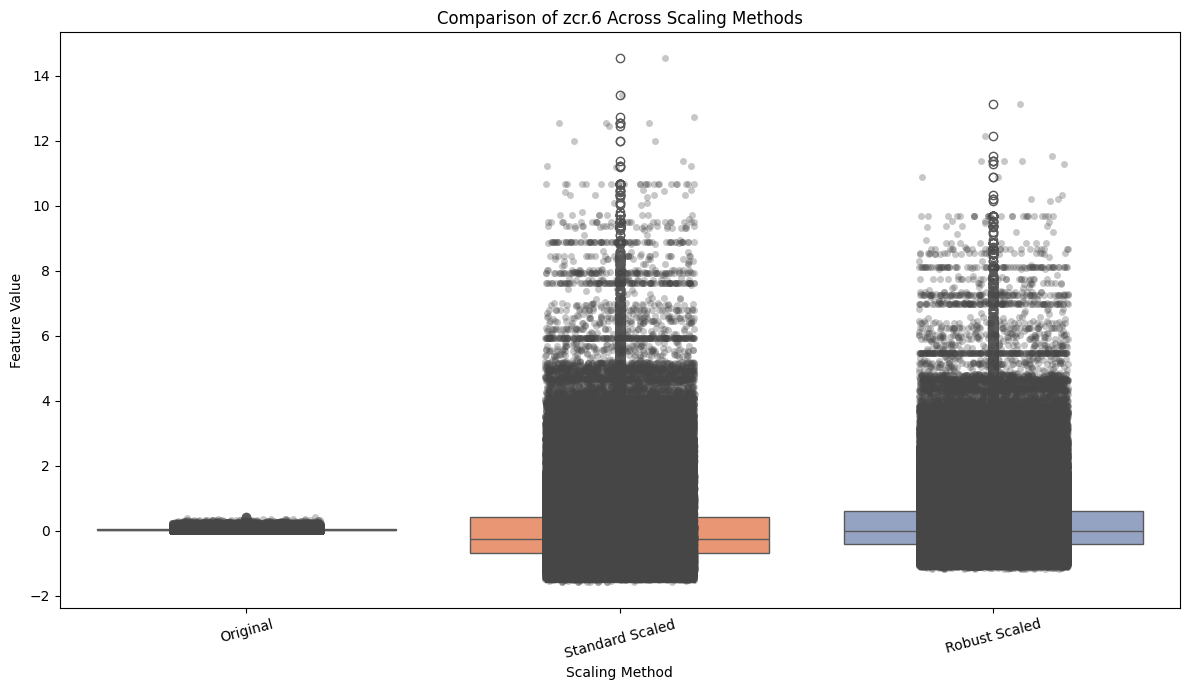

/tmp/ipython-input-23-911324674.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


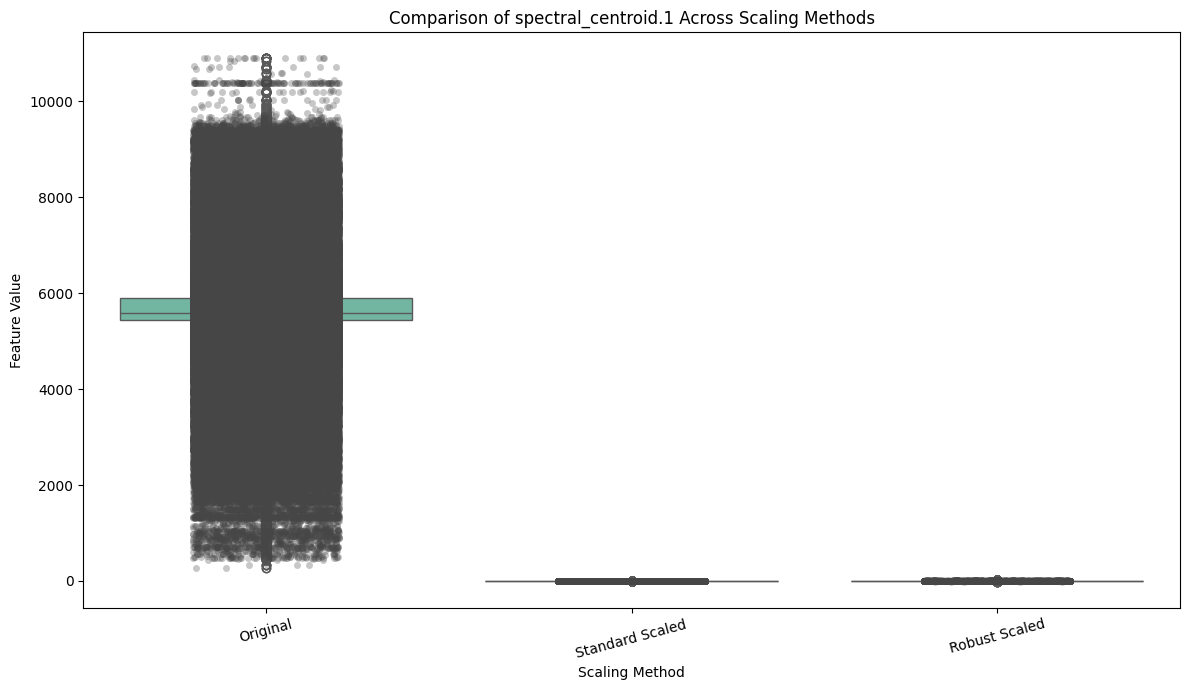

/tmp/ipython-input-23-911324674.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


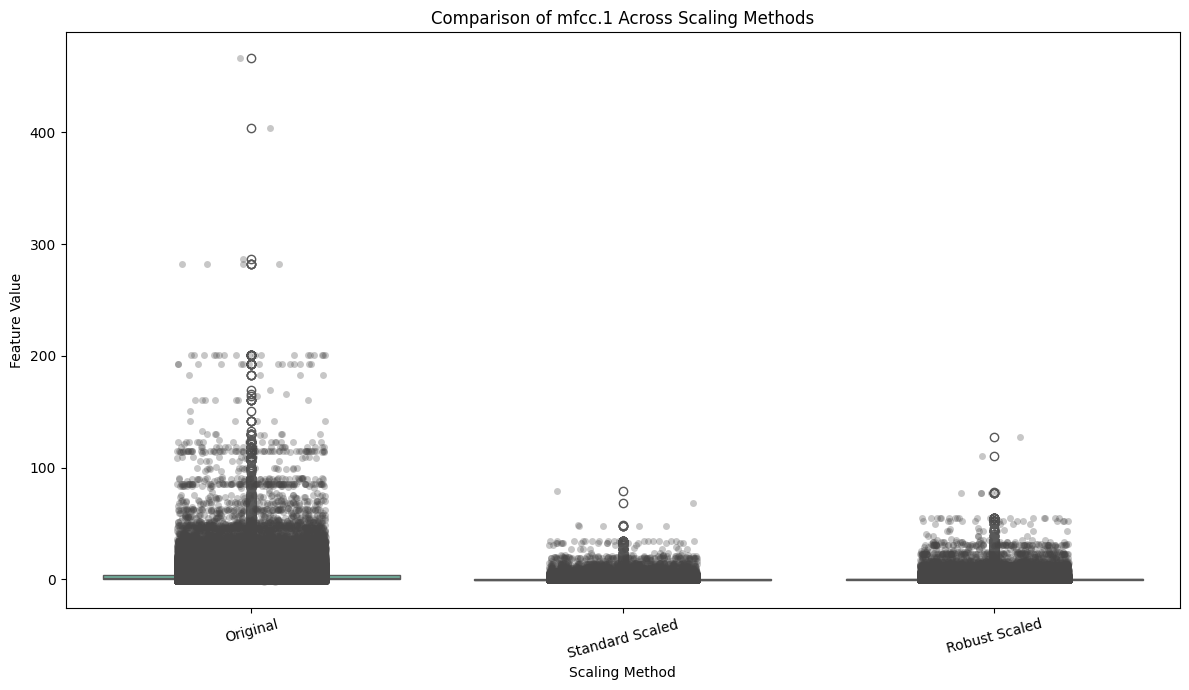

/tmp/ipython-input-23-911324674.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')


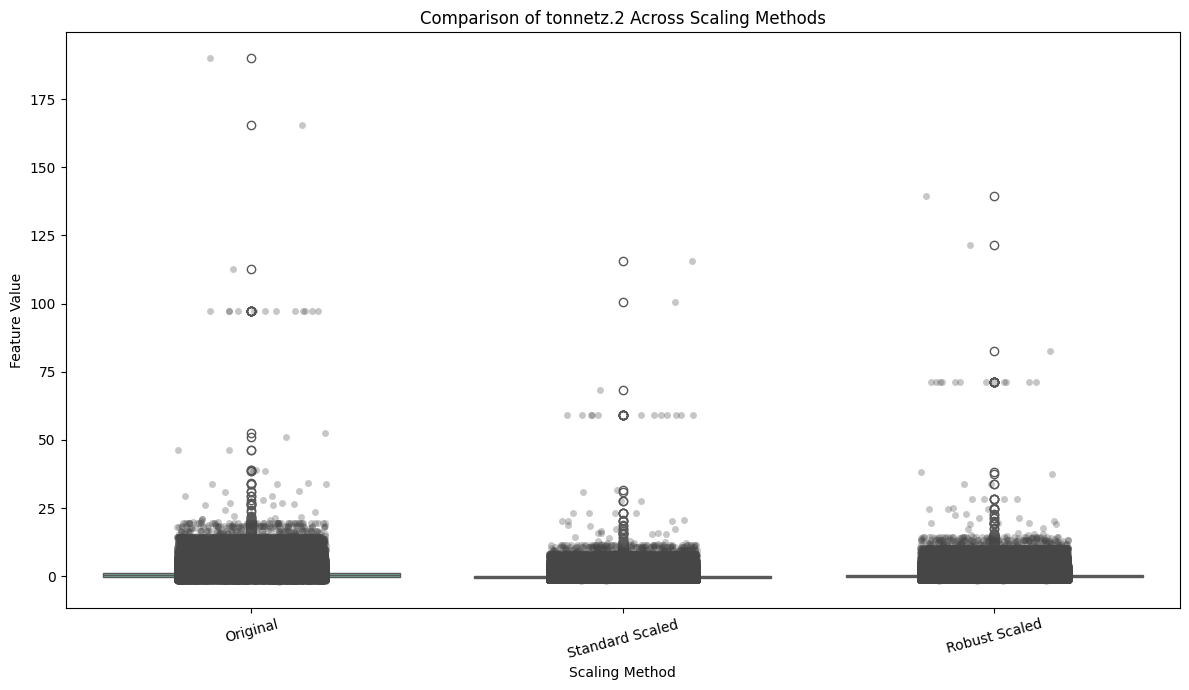

In [ ]:
# Assume X_balanced is your balanced dataset as a DataFrame
# If it's still a numpy array, convert it first:
X_balanced = pd.DataFrame(X_balanced, columns=X.columns)

# Choose a few representative features to compare visually
features_to_plot = ['chroma_cens.4', 'zcr.6', 'spectral_centroid.1', 'mfcc.1', 'tonnetz.2']

for feature in features_to_plot:
    # Apply scalers
    standard_scaled = StandardScaler().fit_transform(X_balanced[[feature]])
    robust_scaled = RobustScaler().fit_transform(X_balanced[[feature]])

    # Prepare long-format DataFrame for Seaborn
    df_plot = pd.DataFrame({
        'Original': X_balanced[feature],
        'Standard Scaled': standard_scaled.flatten(),
        'Robust Scaled': robust_scaled.flatten()
    })

    df_melt = df_plot.melt(var_name='Scaling Method', value_name='Feature Value')

    # Plot
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='Scaling Method', y='Feature Value', data=df_melt, palette='Set2')
    sns.stripplot(x='Scaling Method', y='Feature Value', data=df_melt, color="#474646", alpha=0.3, jitter=0.2)
    plt.title(f'Comparison of {feature} Across Scaling Methods')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

## **conclusion**: robust scaler is better for handling outliers

In [24]:
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_balanced)


## train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

## feature selection select top 200 in importance to decision making

In [ ]:
# rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
# rf.fit(X_train, y_train)

In [ ]:
selector = VarianceThreshold(threshold=0.0)  #
selector.fit(X_train)

In [ ]:
importances = rf.feature_importances_


In [ ]:
indices = np.argsort(importances)[::-1]


In [ ]:
top_n = 200
selected_features = X_train.columns[indices[:top_n]]


In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


## Visualize importance

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=importances[indices[:top_n]], y=selected_features, palette='coolwarm')
plt.title('Top Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


## reducing dimensionality via PCA

In [22]:
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# model trials ana pipelining

In [ ]:
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Support Vector Classifier', SVC()),
    ('Decision Tree', DecisionTreeClassifier(max_depth=15)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100)),
    ('XGBoost', xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y_train)),
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ))
]

## cross validation

In [ ]:
cv_results = {}

for name, model in models:
    print(f'\nTraining {name}...')

    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('pca', PCA(n_components=0.95)),
        ('classifier', model)
    ])

    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

    print(f'{name} Cross-Validation Accuracies: {scores}')
    print(f'{name} Mean Accuracy: {scores.mean():.4f}')

    cv_results[name] = scores.mean()


    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f'\nTest Accuracy for {name}: {accuracy_score(y_test, y_pred):.4f}')
    print(f'\nClassification Report for {name}:\n', classification_report(y_test, y_pred))


    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, cmap='Blues', annot=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()



In [ ]:
results_df = pd.DataFrame(list(cv_results.items()), columns=['Model', 'Cross-Validation Accuracy'])
results_df = results_df.sort_values(by='Cross-Validation Accuracy', ascending=False).reset_index(drop=True)

Displaying accuracies

In [ ]:
display(results_df)

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Cross-Validation Accuracy', y='Model', data=results_df, palette='mako')
plt.title('Cv acc')
plt.xlabel('accurscy')
plt.ylabel('model')
plt.xlim(0, 1)
plt.show()

# selecting the best model

In [ ]:
best_model_name = results_df.iloc[0]['Model']


In [ ]:
model_dict = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', multi_class='multinomial'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Support Vector Classifier': SVC(),
    'Decision Tree': DecisionTreeClassifier(max_depth=15),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=15, n_jobs=-1),
    'AdaBoost': AdaBoostClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'XGBoost': xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y_train)),
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    )
}

In [ ]:
# results = {}


# for name, model in models:
#     print(f'\nTraining {name}...')

#     pipeline = Pipeline([
#         ('scaler', RobustScaler()),
#         ('pca', PCA(n_components=0.95)),
#         ('classifier', model)
#     ])

#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)

#     acc = accuracy_score(y_test, y_pred)
#     print(f'{name} Accuracy: {acc:.4f}')
#     print(f'\nClassification Report for {name}:\n', classification_report(y_test, y_pred))

#     results[name] = acc

#     cm = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(10, 8))
#     sns.heatmap(cm, cmap='Blues', annot=False)
#     plt.title(f'{name} - Confusion Matrix')
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('True Labels')
#     plt.show()


## print accuracies

In [ ]:
# print('\nModel Accuracies:')
# for model_name, accuracy in results.items():
#     print(f'{model_name}: {accuracy:.4f}')

# **trial :** using XGBoost classification

In [ ]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=0.95)),
    ('xgb', xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(set(y_train)),
        eval_metric='mlogloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    ))
])

## define hyperparameter tuning grid

In [ ]:
param_dist = {
    'pca__n_components': [0.90, 0.95, 0.99],
    'xgb__n_estimators': randint(100, 500),
    'xgb__max_depth': randint(5, 15),
    'xgb__learning_rate': uniform(0.01, 0.2),
    'xgb__subsample': uniform(0.7, 0.3),
    'xgb__colsample_bytree': uniform(0.7, 0.3)
}


## run radomized search CV

In [ ]:
random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

### find best pipeline


In [ ]:
best_pipeline = random_search.best_estimator_


In [ ]:
random_search.best_params_

# best model evaluation

In [ ]:
y_pred = best_pipeline.predict(X_test)


In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
classification_report(y_test, y_pred)

## confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, cmap='Blues', annot=False)
plt.title('XGBoost Pipeline Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Logistic regression training

In [26]:
lr_model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    multi_class='multinomial',
    solver='lbfgs',
    random_state=42
)

In [28]:
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)

In [30]:
y_pred = lr_model.predict(X_test)


In [31]:
accuracy_score(y_test, y_pred)

0.35325297156537444

In [32]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           1       0.34      0.03      0.05      1600\n           2       0.06      0.00      0.01      1000\n           3       0.37      0.23      0.28      1000\n           4       0.10      0.01      0.02      1000\n           5       0.27      0.35      0.31      1000\n           6       0.18      0.07      0.10      1000\n           7       0.17      0.09      0.12      1000\n           8       0.55      0.75      0.63      1000\n           9       0.24      0.07      0.11      1000\n          10       0.09      0.01      0.01      1182\n          11       0.26      0.08      0.12      1000\n          12       0.04      0.00      0.01      1328\n          13       0.22      0.16      0.18      1000\n          14       0.16      0.12      0.14      1000\n          15       0.04      0.00      0.00      1600\n          16       0.55      0.45      0.50      1000\n          17       0.12      0.08      0.09      1000\n       

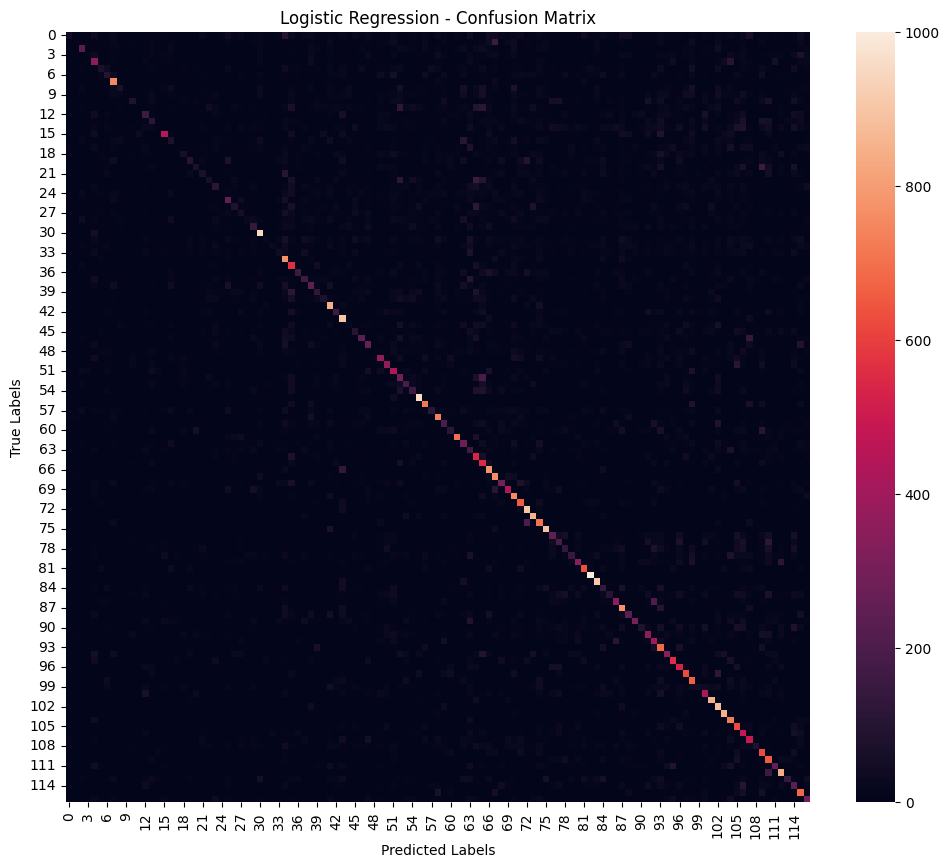

In [33]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=False)
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Exporting the classification model**

In [35]:
joblib.dump(lr_model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

# **Saving the scaler**

In [36]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']